# 從政治獻金與總統候選人粉專內容瞭解政治幕前幕後的差異

## 分為兩種分析：
### 1. 幕後：政黨背後的金援支持者
  * 利用最近期的政治獻金做分析(107年)  
  * 資料來源：[監察院- 政治獻金公開查閱平臺](https://ardata.cy.gov.tw/home)  
  
### 2. 幕前：2020總統大選網路風向情形
  * 利用總統候選人的FB粉專發文內容，來了解網路政治風向  
  * 時間：2019/1/1-2019/11/30  
  * [Fanpage Karma](https://www.fanpagekarma.com/)

---

# 【幕後】 

# I. Preparion

### 匯入套件

In [387]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname=r'C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/NotoSansCJKtc-Regular.otf')
%matplotlib inline

### 匯入文檔

In [2]:
DDT = pd.read_csv(r'C:\Users\acgan\Desktop\Anaconda\Data Mining\week7\Data\DDT\incomes.csv', encoding="UTF-8")

In [3]:
KMT = pd.read_csv(r'C:\Users\acgan\Desktop\Anaconda\Data Mining\week7\Data\KMT\incomes.csv', encoding = 'big5hkscs')

In [4]:
PFP = pd.read_csv(r'C:\Users\acgan\Desktop\Anaconda\Data Mining\week7\Data\PFP\incomes.csv', encoding="UTF-8")

In [5]:
display(DDT.head(3),KMT.head(3),PFP.head(3))

,序號,擬參選人／政黨,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,1,民主進步黨,NaN,107,1070101,個人捐贈收入,陳芝菁,NaN,432.0,0.0,NaN,金錢,台中市龍井區****,NaN,NaN
1,2,民主進步黨,NaN,107,1070102,個人捐贈收入,唐碧娥,D22*******,220000.0,0.0,NaN,金錢,台南市北區和****,NaN,NaN
2,3,民主進步黨,NaN,107,1070102,個人捐贈收入,張山文,D12*******,400.0,0.0,NaN,金錢,高雄市楠梓區****,NaN,NaN


,序號,擬參選人／政黨,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,1,中國國民黨,NaN,107,1070102,個人捐贈收入,陳寶生,A12*******,300,0,NaN,金錢,台中市沙鹿區****,NaN,NaN
1,2,中國國民黨,NaN,107,1070103,營利事業捐贈收入,福安礦業股份有限公司,27483964,1000000,0,NaN,金錢,宜蘭縣宜蘭市****,NaN,NaN
2,3,中國國民黨,NaN,107,1070103,個人捐贈收入,齊祿祉,B22*******,2000,0,NaN,金錢,台中市北屯區****,NaN,NaN


,序號,擬參選人／政黨,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,1,親民黨,NaN,107,1070102,個人捐贈收入,林家安,A12*******,107.0,0.0,NaN,金錢,臺北市士林區****,NaN,NaN
1,2,親民黨,NaN,107,1070109,個人捐贈收入,朱建成,D10*******,600.0,0.0,NaN,金錢,臺北市松山區****,NaN,NaN
2,3,親民黨,NaN,107,1070117,個人捐贈收入,周陳秀霞,R22*******,100000.0,0.0,NaN,金錢,臺南市玉井區****,NaN,NaN


---

# II. Pre-processing

### 資料表欄位是否相同

In [6]:
if len(DDT.columns.values) == len(KMT.columns.values) == len(PFP.columns.values):
    print('Yes')
else:
    print('No')

Yes


### 整理政黨資料表

In [7]:
DDT.columns.values

array(['序號', '擬參選人／政黨', '選舉名稱', '申報序號／年度', '交易日期', '收支科目', '捐贈者／支出對象',
       '身分證／統一編號', '收入金額', '支出金額', '支出用途', '金錢類', '地址', '聯絡電話', '資料更正日期'],
      dtype=object)

#### DDT

In [8]:
DDT = DDT[['擬參選人／政黨','交易日期', '收支科目', '捐贈者／支出對象', '收入金額', '地址']]
DDT.rename(columns={"擬參選人／政黨": "政黨", "捐贈者／支出對象": "捐贈者"},inplace=True)

In [9]:
DDT['交易日'] = DDT['交易日期'].astype(str)
DDT['捐贈月'] = DDT['交易日'].str.slice(3,5)
DDT['捐贈日'] = DDT['交易日'].str.slice(5)
DDT['捐贈地區'] = DDT['地址'].str.slice(0,3)

In [10]:
DDT.drop(columns=['地址','交易日'],inplace=True)

#### KMT

In [11]:
KMT = KMT[['擬參選人／政黨','交易日期', '收支科目', '捐贈者／支出對象', '收入金額', '地址']]
KMT.rename(columns={"擬參選人／政黨": "政黨", "捐贈者／支出對象": "捐贈者"},inplace=True)

In [12]:
KMT['交易日'] = KMT['交易日期'].astype(str)
KMT['捐贈月'] = KMT['交易日'].str.slice(3,5)
KMT['捐贈日'] = KMT['交易日'].str.slice(5)
KMT['捐贈地區'] = KMT['地址'].str.slice(0,3)

In [13]:
KMT.drop(columns=['地址','交易日'],inplace=True)

#### PFP

In [14]:
PFP = PFP[['擬參選人／政黨','交易日期', '收支科目', '捐贈者／支出對象', '收入金額', '地址']]
PFP.rename(columns={"擬參選人／政黨": "政黨", "捐贈者／支出對象": "捐贈者"},inplace=True)

In [15]:
PFP['交易日'] = PFP['交易日期'].astype(str)
PFP['捐贈月'] = PFP['交易日'].str.slice(3,5)
PFP['捐贈日'] = PFP['交易日'].str.slice(5)
PFP['捐贈地區'] = PFP['地址'].str.slice(0,3)

In [16]:
PFP.drop(columns=['地址','交易日'],inplace=True)

In [17]:
display(DDT.head(),KMT.head(),PFP.head())

,政黨,交易日期,收支科目,捐贈者,收入金額,捐贈月,捐贈日,捐贈地區
0,民主進步黨,1070101,個人捐贈收入,陳芝菁,432.0,01,01,台中市
1,民主進步黨,1070102,個人捐贈收入,唐碧娥,220000.0,01,02,台南市
2,民主進步黨,1070102,個人捐贈收入,張山文,400.0,01,02,高雄市
3,民主進步黨,1070102,個人捐贈收入,張榮哲,10000.0,01,02,新竹市
4,民主進步黨,1070102,個人捐贈收入,段宜康,200000.0,01,02,台北市


,政黨,交易日期,收支科目,捐贈者,收入金額,捐贈月,捐贈日,捐贈地區
0,中國國民黨,1070102,個人捐贈收入,陳寶生,300,01,02,台中市
1,中國國民黨,1070103,營利事業捐贈收入,福安礦業股份有限公司,1000000,01,03,宜蘭縣
2,中國國民黨,1070103,個人捐贈收入,齊祿祉,2000,01,03,台中市
3,中國國民黨,1070105,個人捐贈收入,許毓仁,100000,01,05,台北市
4,中國國民黨,1070105,個人捐贈收入,楊淑貞,3513,01,05,宜蘭縣


,政黨,交易日期,收支科目,捐贈者,收入金額,捐贈月,捐贈日,捐贈地區
0,親民黨,1070102,個人捐贈收入,林家安,107.0,01,02,臺北市
1,親民黨,1070109,個人捐贈收入,朱建成,600.0,01,09,臺北市
2,親民黨,1070117,個人捐贈收入,周陳秀霞,100000.0,01,17,臺南市
3,親民黨,1070201,個人捐贈收入,林家安,107.0,02,01,臺北市
4,親民黨,1070209,個人捐贈收入,李鴻鈞,200000.0,02,09,新北市


In [298]:
display(DDT.shape,KMT.shape,PFP.shape)

(2715, 8)

(2108, 8)

(67, 8)

# III.Analsys and Visualization

3.1 政黨收入分析  
3.2 時間趨勢   
3.3 地區分布

# 3.1 政黨收入分析

## 3.1.1 捐贈總收入比較

In [147]:
name = ['民進黨','國民黨','親民黨']
column = ['Total Income']
details = [[DDT.收入金額.sum()],[KMT.收入金額.sum()],[PFP.收入金額.sum()]]
df = pd.DataFrame(details, index = name, columns = column)

In [148]:
partyamount = details[0]+details[1]+details[2]

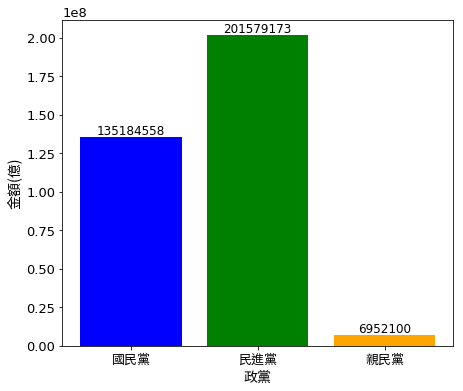

In [274]:
#df.plot(kind="bar",figsize =(7,5),ylim=(0,250000000),color=['r', 'g', 'b']) 另一種畫法

plt.figure(figsize=(7,6))
plt.bar(name, partyamount, color=['g', 'b', 'orange'])
plt.xlabel("政黨", fontproperties=my_font, fontsize=14)
plt.ylabel("金額(億)", fontproperties=my_font, fontsize=14)

#刻度字體
plt.xticks(fontproperties=my_font, fontsize=13)

#設置數值
for a,b in zip(name,partyamount):  
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)

## 3.1.2 捐贈來源分析

In [270]:
print('民進黨：',DDT.收支科目.unique())
print('國民黨：',KMT.收支科目.unique())
print('親民黨：',PFP.收支科目.unique())

民進黨： ['個人捐贈收入' '營利事業捐贈收入' '匿名捐贈收入' '其它收入' '人民團體捐贈收入']
國民黨： ['個人捐贈收入' '營利事業捐贈收入' '匿名捐贈收入' '人民團體捐贈收入' '其它收入']
親民黨： ['個人捐贈收入' '營利事業捐贈收入' '匿名捐贈收入' '其它收入']


### DDT

> * 收入來源分類與佔比

In [271]:
DDT_cate_count = DDT.groupby(['收支科目'],as_index=False)['收入金額'].count() #捐贈類別
DDT_cate_sum = DDT.groupby(['收支科目'],as_index=False)['收入金額'].sum() #總額
DDT_cate = pd.merge(DDT_cate_count, DDT_cate_sum, on='收支科目')
DDT_cate.rename(columns = {"收入金額_x":"總次數","收入金額_y":"總金額"},inplace = True) #修改欄位名稱
DDT_cate['佔比'] = (DDT_cate['總金額']/partyamount[0] * 100).round(decimals=2) #新增佔比欄位
DDT_cate

,收支科目,總次數,總金額,佔比
0,人民團體捐贈收入,7,584000.0,0.29
1,個人捐贈收入,2291,131371396.0,65.17
2,其它收入,2,59128.0,0.03
3,匿名捐贈收入,219,726649.0,0.36
4,營利事業捐贈收入,196,68838000.0,34.15


> * 捐贈金額最高前15名

In [313]:
DDT_from_count = DDT.groupby(['捐贈者'],as_index=False)['收入金額'].count() #捐贈者次數
DDT_from_amount = DDT.groupby(['捐贈者'],as_index=False)['收入金額'].sum() #捐贈者金額
DDT_from = pd.merge(DDT_from_count, DDT_from_amount, on='捐贈者')
DDT_from.rename(columns = {"收入金額_x":"捐贈總次數","收入金額_y":"捐贈總金額"},inplace = True) #修改欄位名稱

In [346]:
DDT_from.sort_values(["捐贈總金額","捐贈總次數"],ascending=(False,False),inplace=True)
DDT_from.head(15)

,捐贈者,捐贈總次數,捐贈總金額
588,新泉營造股份有限公司,3,2650000.0
2204,鼎固營造股份有限公司,3,2650000.0
1626,遊戲橘子數位科技股份有限公司,2,2000000.0
569,怡達資產管理有限公司,2,2000000.0
174,北碁建設股份有限公司,1,2000000.0
335,奇達電訊工程有限公司,1,2000000.0
15,亞昕國際開發股份有限公司,1,2000000.0
12,中福營造股份有限公司,1,2000000.0
728,李進勇,2,1663250.0
370,峯安投資顧問有限公司,4,1600000.0


前15名幾乎為營造公司、建設公司、電子業  
李進勇曾擔任雲林縣縣長(2014 年–2018 年)，為民進黨員，2019退出政黨

> * 捐贈次數最多前15名

In [347]:
DDT_from.sort_values(["捐贈總次數","捐贈總金額"],ascending=(False,False),inplace=True)
DDT_from.head(15)

,捐贈者,捐贈總次數,捐贈總金額
2117,黃彥智,85,8563.0
1117,無名氏,37,202486.0
175,匿名,13,56844.0
2175,黃筱雯,12,12000.0
2065,高鈺琪,12,3600.0
133,劉桂莉,11,11000.0
79,傅楊玉珠,7,3500.0
435,張天惠,6,90000.0
264,呂思翰,6,90000.0
452,張慧姬,6,90000.0


[鍾孔炤](https://zh.wikipedia.org/wiki/%E9%8D%BE%E5%AD%94%E7%82%A4)：民進黨員，曾任高雄市政府勞工局長  
[黃傅淑香](https://votetw.com/wiki/%E9%BB%83%E5%82%85%E6%B7%91%E9%A6%99#2014.E5.B9.B4.E6.A1.83.E5.9C.92.E5.B8.82.E8.AD.B0.E5.93.A1.E9.81.B8.E8.88.89.EF.BC.88.E7.95.B6.E9.81.B8.EF.BC.89)：民主進步黨籍，曾任桃園市議員  
國會辦公室助理資訊相關：張天惠、呂思翰、林衢成

---

### KMT

> * 收入來源分類與佔比

In [335]:
KMT_cate_count = KMT.groupby(['收支科目'],as_index=False)['收入金額'].count() #捐贈類別
KMT_cate_sum = KMT.groupby(['收支科目'],as_index=False)['收入金額'].sum() #總額
KMT_cate = pd.merge(KMT_cate_count, KMT_cate_sum, on='收支科目')
KMT_cate.rename(columns = {"收入金額_x":"總次數","收入金額_y":"總金額"},inplace = True) #修改欄位名稱
KMT_cate['佔比'] = (KMT_cate['總金額']/partyamount[1] * 100).round(decimals=2) #新增佔比欄位
KMT_cate

,收支科目,總次數,總金額,佔比
0,人民團體捐贈收入,21,3665000,2.71
1,個人捐贈收入,1758,66423701,49.14
2,其它收入,2,10040,0.01
3,匿名捐贈收入,145,137817,0.10
4,營利事業捐贈收入,182,64948000,48.04


> * 捐贈金額最高前15名

In [331]:
KMT_from_count = KMT.groupby(['捐贈者'],as_index=False)['收入金額'].count() #捐贈者次數
KMT_from_amount = KMT.groupby(['捐贈者'],as_index=False)['收入金額'].sum() #捐贈者金額
KMT_from = pd.merge(KMT_from_count, KMT_from_amount, on='捐贈者')
KMT_from.rename(columns = {"收入金額_x":"捐贈總次數","收入金額_y":"捐贈總金額"},inplace = True) #修改欄位名稱

In [349]:
KMT_from.sort_values(["捐贈總金額","捐贈總次數"],ascending=(False,False),inplace=True)
KMT_from.head(15)

,捐贈者,捐贈總次數,捐贈總金額
1135,裕元投資股份有限公司,4,4000000
840,燿華電子股份有限公司,9,3000000
1238,遠鼎投資股份有限公司,3,3000000
255,太平洋崇光百貨股份有限公司,3,3000000
405,德勤投資股份有限公司,3,3000000
1665,鼎豐傳播事業股份有限公司,1,3000000
445,日月高投資股份有限公司,5,2500000
16,亞洲水泥股份有限公司,3,2500000
1234,達泰投資股份有限公司,8,2300000
15,亞洲投資股份有限公司,2,2000000


前15名幾乎為投資公司、傳播業

> * 捐贈次數最高前15名

In [350]:
KMT_from.sort_values(["捐贈總次數","捐贈總金額"],ascending=(False,False),inplace=True)
KMT_from.head(10)

,捐贈者,捐贈總次數,捐贈總金額
1587,黃彥智,75,497
117,匿名,60,106220
12,中華民國全國建築師公會,10,1400000
1392,陳寶生,10,3000
840,燿華電子股份有限公司,9,3000000
718,楊尚修,9,18000
1032,萬啟雯,9,1800
1234,達泰投資股份有限公司,8,2300000
686,林鈺茗,8,3100
18,仇北屏,7,7000


發現：中華民國全國建築師公會的捐贈總金額相當高  
達泰投資股份有限公司 是 燿華電子股份有限公司 的子公司

---

### PFP

> * 收入來源分類與佔比

In [273]:
PFP_cate_count = PFP.groupby(['收支科目'],as_index=False)['收入金額'].count() #捐贈類別
PFP_cate_sum = PFP.groupby(['收支科目'],as_index=False)['收入金額'].sum() #總額
PFP_cate = pd.merge(PFP_cate_count, PFP_cate_sum, on='收支科目')
PFP_cate.rename(columns = {"收入金額_x":"總次數","收入金額_y":"總金額"},inplace = True) #修改欄位名稱
PFP_cate['佔比'] = (PFP_cate['總金額']/partyamount[2] * 100).round(decimals=2) #新增佔比欄位
PFP_cate

,收支科目,總次數,總金額,佔比
0,個人捐贈收入,54,4150984.0,59.71
1,其它收入,2,10015.0,0.14
2,匿名捐贈收入,5,11101.0,0.16
3,營利事業捐贈收入,6,2780000.0,39.99


> * 捐贈金額最高前15名

In [333]:
PFP_from_count = PFP.groupby(['捐贈者'],as_index=False)['收入金額'].count() #捐贈者次數
PFP_from_amount = PFP.groupby(['捐贈者'],as_index=False)['收入金額'].sum() #捐贈者金額
PFP_from = pd.merge(PFP_from_count, PFP_from_amount, on='捐贈者')
PFP_from.rename(columns = {"收入金額_x":"捐贈總次數","收入金額_y":"捐贈總金額"},inplace = True) #修改欄位名稱

In [345]:
PFP_from.sort_values(["捐贈總金額","捐贈總次數"],ascending=(False,False),inplace=True)
PFP_from.head(15)

,捐贈者,捐贈總次數,捐贈總金額
6,功誠建設股份有限公司,1,780000.0
18,捷順建設有限公司,1,500000.0
30,正大尼龍工業股份有限公司,1,500000.0
13,安家國際企業股份有限公司,1,500000.0
29,正僑開發股份有限公司,1,250000.0
31,正大纖維工業股份有限公司,1,250000.0
8,周五六,2,200000.0
40,陳進吉,2,200000.0
11,周陳秀霞,2,200000.0
10,周怡吟,2,200000.0


> * 捐贈次數最高前15名

In [344]:
PFP_from.sort_values(["捐贈總次數","捐贈總金額"],ascending=(False,False),inplace=True)
PFP_from.head(15)

,捐贈者,捐贈總次數,捐贈總金額
26,林家安,12,1284.0
19,朱建成,3,1800.0
8,周五六,2,200000.0
40,陳進吉,2,200000.0
11,周陳秀霞,2,200000.0
10,周怡吟,2,200000.0
45,龍思呈,2,200000.0
5,利息收入,2,10015.0
2,152244,2,1000.0
6,功誠建設股份有限公司,1,780000.0


周五六：是親民黨台南市政治人物，曾任立法委員、台南縣議會議長  
周陳秀霞：周五六的妻子，為親民黨不分區立法委員  
龍思呈：無黨籍

---

# 3.2 時間趨勢

### DDT

In [351]:
DDT_month_count = DDT.groupby(['捐贈月'],as_index=False)['收入金額'].count() #單月捐贈總次數
DDT_month_sum = DDT.groupby(['捐贈月'],as_index=False)['收入金額'].sum() #單月捐贈總金額
DDT_month = pd.merge(DDT_month_count, DDT_month_sum, on='捐贈月') #合併建立dataframe
DDT_month.rename(columns = {"收入金額_x":"總次數","收入金額_y":"總金額"},inplace = True) #修改欄位名稱
DDT_month['該月平均單筆金額'] = DDT_month['總金額']/DDT_month['總次數'] #該月平均單筆捐贈金額
DDT_month['該月平均單筆金額']=DDT_month['該月平均單筆金額'].round(decimals=0) #小數位後1位
DDT_month

,捐贈月,總次數,總金額,該月平均單筆金額
0,01,230,14906433.0,64811.0
1,02,56,2756997.0,49232.0
2,03,121,9557925.0,78991.0
3,04,108,11257386.0,104235.0
4,05,245,24718863.0,100893.0
5,06,129,14735391.0,114228.0
6,07,169,12687568.0,75074.0
7,08,133,23222020.0,174602.0
8,09,319,24227198.0,75947.0
9,10,191,14713608.0,77035.0


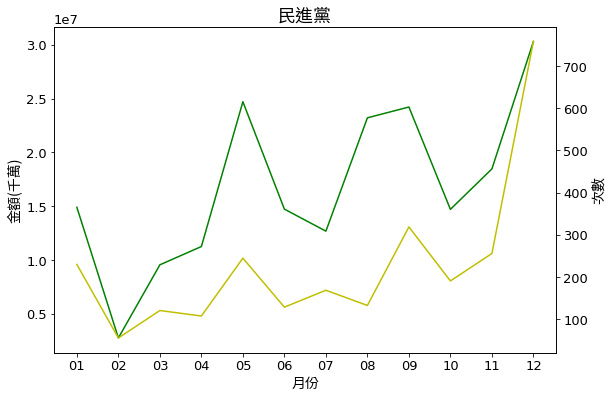

In [110]:
x = DDT_month['捐贈月']
y1 = DDT_month['總金額'].values
y2 = DDT_month['總次數'].values

fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(111)
ax1.plot(x, y1,"g")
ax1.set_ylabel('金額(千萬)', fontproperties=my_font, fontsize=14)
ax1.set_xlabel('月份', fontproperties=my_font, fontsize=14)
ax1.set_title("民進黨", fontproperties=my_font, fontsize=18)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, "y")
ax2.set_ylabel('次數', fontproperties=my_font, fontsize=14)
ax2.set_xlabel('月份', fontproperties=my_font, fontsize=14)

plt.show()

DDT 收入最高的月份是12月，收入超過700萬

#### KMT

In [23]:
KMT_month_count = KMT.groupby(['捐贈月'],as_index=False)['收入金額'].count() #單月捐贈總次數
KMT_month_sum = KMT.groupby(['捐贈月'],as_index=False)['收入金額'].sum() #單月捐贈總金額
KMT_month = pd.merge(KMT_month_count, KMT_month_sum, on='捐贈月') #合併建立dataframe
KMT_month.rename(columns = {"收入金額_x":"總次數","收入金額_y":"總金額"},inplace = True) #修改欄位名稱
KMT_month['該月平均單筆金額'] = KMT_month['總金額']/KMT_month['總次數'] #該月平均單筆捐贈金額
KMT_month['該月平均單筆金額']=KMT_month['該月平均單筆金額'].round(decimals=0) #小數位後1位
KMT_month

,捐贈月,總次數,總金額,該月平均單筆金額
0,01,98,5184479,52903.0
1,02,35,1970200,56291.0
2,04,32,1353826,42307.0
3,05,222,11398965,51347.0
4,06,101,4459806,44156.0
5,07,108,4598048,42575.0
6,08,467,16587022,35518.0
7,09,231,17016379,73664.0
8,10,535,32339827,60448.0
9,11,181,32656720,180424.0


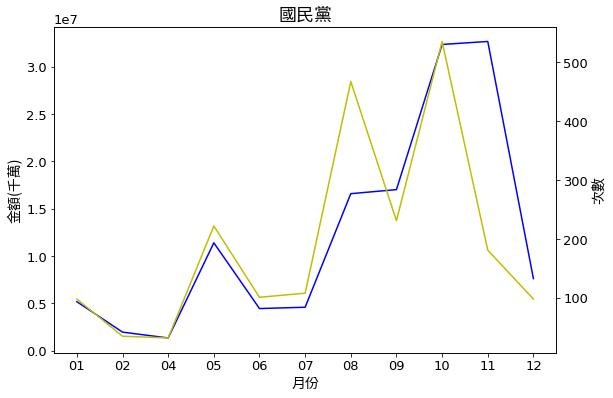

In [111]:
x = KMT_month['捐贈月']
y1 = KMT_month['總金額'].values
y2 = KMT_month['總次數'].values

fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(111)
ax1.plot(x, y1,"b")
ax1.set_ylabel('金額(千萬)', fontproperties=my_font, fontsize=14)
ax1.set_xlabel('月份', fontproperties=my_font, fontsize=14)
ax1.set_title("國民黨", fontproperties=my_font, fontsize=18)

ax2 = ax1.twinx()
ax2.plot(x, y2, "y")
ax2.set_ylabel('次數', fontproperties=my_font, fontsize=14)
ax2.set_xlabel('月份', fontproperties=my_font, fontsize=14)

plt.show()

#### PFP

In [25]:
PFP_month_count = PFP.groupby(['捐贈月'],as_index=False)['收入金額'].count() #單月捐贈總次數
PFP_month_sum = PFP.groupby(['捐贈月'],as_index=False)['收入金額'].sum() #單月捐贈總金額
PFP_month = pd.merge(PFP_month_count, PFP_month_sum, on='捐贈月') #合併建立dataframe
PFP_month.rename(columns = {"收入金額_x":"總次數","收入金額_y":"總金額"},inplace = True) #修改欄位名稱
PFP_month['該月平均單筆金額'] = PFP_month['總金額']/PFP_month['總次數'] #該月平均單筆捐贈金額
PFP_month['該月平均單筆金額']=PFP_month['該月平均單筆金額'].round(decimals=0) #小數位後1位
PFP_month

,捐贈月,總次數,總金額,該月平均單筆金額
0,01,3,100707.0,33569.0
1,02,3,300107.0,100036.0
2,03,5,1100107.0,220021.0
3,04,9,900707.0,100079.0
4,05,5,880707.0,176141.0
5,06,5,314830.0,62966.0
6,07,5,111207.0,22241.0
7,08,6,830407.0,138401.0
8,09,2,100107.0,50054.0
9,10,6,501107.0,83518.0


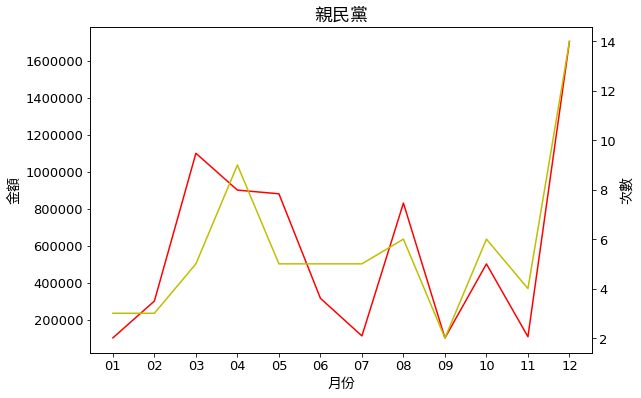

In [112]:
x = PFP_month['捐贈月']
y1 = PFP_month['總金額'].values
y2 = PFP_month['總次數'].values

fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(111)
ax1.plot(x, y1,"r")
ax1.set_ylabel('金額', fontproperties=my_font, fontsize=14)
ax1.set_xlabel('月份', fontproperties=my_font, fontsize=14)
ax1.set_title("親民黨", fontproperties=my_font, fontsize=18)

ax2 = ax1.twinx()
ax2.plot(x, y2, "y")
ax2.set_ylabel('次數', fontproperties=my_font, fontsize=14)
ax2.set_xlabel('月份', fontproperties=my_font, fontsize=14)

plt.show()

#### 2018年底發生什麼事情呢？  
11/24舉行九合一選舉(大選綁公投)，主要為直轄市、縣市議員選舉  
10/21日發生普悠瑪列車出軌事故

---

# 【幕前】

# 2020總統大選候選人FB 粉專文章分析  
時間：2019/1/1-2019/11/30

# I.Pre-processing

## 1.1 讀取文檔_html

In [589]:
Tsai = pd.read_html(r'C:\Users\acgan\Desktop\Anaconda\Data Mining\week7\Data\FB2019\DDT\Dashboard.html')

In [619]:
Han = pd.read_html(r'C:\Users\acgan\Desktop\Anaconda\Data Mining\week7\Data\FB2019\KMT\Dashboard.html')

## 1.2 清整資料

#### 民進黨候選人：蔡英文

In [590]:
DDTdf = Tsai[3]
DDTdf.head()

,,Number of Comments
0,1 蔡英文 Tsai Ing-wen 11/30/19 9:40 PM 蔡英文新北市和桃園的...,700
1,2 蔡英文 Tsai Ing-wen 11/30/19 8:00 PM 我在雲林參加 蘇治芬...,4.3k
2,3 蔡英文 Tsai Ing-wen 11/30/19 5:55 PM 我在台中參加 洪慈庸...,1.3k
3,4 蔡英文 Tsai Ing-wen 11/30/19 3:50 PM 我在苗栗參加競選總部...,1.3k
4,5 蔡英文 Tsai Ing-wen 11/30/19 2:55 PM 我在新竹會紅 輝向未...,1.3k


In [591]:
DDTdf.columns = ['post', 'comment'] #重設欄位名稱
DDTdf = DDTdf['post'].str.split('PM|AM',expand=True) #以PM或AM切割string
DDTdf.head()

,0,1,2
0,1 蔡英文 Tsai Ing-wen 11/30/19 9:40,蔡英文新北市和桃園的競選總部明天成立，新北和桃園的朋友都要來喔！ 現場活動很豐富，有熱鬧...,None
1,2 蔡英文 Tsai Ing-wen 11/30/19 8:00,我在雲林參加 蘇治芬競選總部成立大會，大家有在現場嗎？,None
2,3 蔡英文 Tsai Ing-wen 11/30/19 5:55,我在台中參加 洪慈庸的競選總部成立大會，有在現場的來留言喔！,None
3,4 蔡英文 Tsai Ing-wen 11/30/19 3:50,我在苗栗參加競選總部成立大會，在現場的朋友來留言吧！ 選做事的人．羅貴星 徐定禎,None
4,5 蔡英文 Tsai Ing-wen 11/30/19 2:55,我在新竹會紅 輝向未來 蔡英文&鄭宏輝聯合競選總部成立大會，有到現場的朋友可以留言告訴我嗎...,None


In [592]:
DDTdf.columns = ['time', 'post','n'] #重設欄位
DDTdf = DDTdf.drop(['time','n'], axis =1) #留下post

In [594]:
DDTdf = DDTdf.drop([738]) #刪除最後一行沒有內容的列

In [598]:
DDTdf = DDTdf.values.tolist() #轉為list做後續文字處理

In [599]:
print('蔡英文發文總數：',len(DDTdf))

蔡英文發文總數： 738


#### 國民黨候選人：韓國瑜

In [620]:
KMTdf = Han[4]
KMTdf.columns = ['post', 'comment'] #重設欄位名稱
KMTdf = KMTdf['post'].str.split('PM|AM',expand=True) #以PM或AM切割string
KMTdf.columns = ['time','post'] #重設欄位
KMTdf = KMTdf.drop(['time'], axis =1) #留下post
KMTdf = KMTdf.drop([380]) #刪除最後一行沒有內容的列
KMTdf.head()

,post
0,【萌寵音樂嘉年華－嘉義場】 《萌寵音樂嘉年華》嘉義場順利落幕，非常感謝一同前來關懷毛小孩的...
1,選舉越骯髒，執政必貪腐 選舉越清廉，執政越廉潔 #老話一句當選後我若貪污放棄假釋把我關到死
2,《國政領航、台灣富強》國政報告
3,麻煩各位好朋友從現在開始接到民調電話通通說「唯一支持蔡英文」，我們一起讓民進黨高興到202...
4,［通關密語—「夜襲」最後四句話］ 2020總統大選—是台灣選舉史上最荒謬的一次。 民進黨執...


In [621]:
KMTdf = KMTdf.values.tolist() #轉為list

In [622]:
print('韓國瑜發文總數：',len(KMTdf))

韓國瑜發文總數： 380


# II. Analysis

## 2.1 DDT

In [864]:
#將list轉為string
DDTls=[]
for i in range(len(DDTdf)):
    post = str(DDTdf[i]).lstrip(" ['").rstrip("']")
    DDTls.append(post)

In [865]:
DDTls[0]

'蔡英文新北市和桃園的競選總部明天成立，新北和桃園的朋友都要來喔！  現場活動很豐富，有熱鬧的表演和有趣的市集，直播車 #辣台號 也會在現場，希望明天可以看到大家。  🎊2020蔡英文總統連任新北市競選總部開幕 13:00-16:30 地點：板橋第二運動場 地址：新北市板橋區民權路117號  🎊2020蔡英文總統連桃園市北區競選總部開幕 14:30-18:00 兒童樂園活動 15:30-18:00舞台活動 地點：北桃園競選總部 地址：桃園市桃園區大興西路三段、正光路口  🎊2020蔡英文總統連任桃園市南區競選總部開幕 14:30-21:00主題市集活動 18:00-20:30 舞台活動 地點：南桃園競選總部 地址：桃園市中壢區復興路(中壢圖書館前)  ✅來看小英日常看直播車在哪裡：https://ingdaily.tw/code-1450 👉小額捐款點這邊： https://donate.iing.tw 👉我要投稿小英安價：https://ingdaily.tw/story'

### 讀入jieba 刪除停用詞

In [866]:
import jieba

In [867]:
stopWords=[]
with open('C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [868]:
text = []
for line in DDTls:
    for j in stopWords:
        line = line.replace(j, '')
        line = line.replace('\n', '')
        line = line.replace('::', '')
    text.append(line)

In [869]:
text[0]

'蔡英文新北市桃園競選總部明天成立新北桃園朋友  現場活動豐富熱鬧表演趣市集直播車 辣台號 會現場希明天家  蔡英文總統新北市競選總部開幕  點板橋二運動場 址新北市板橋區民權路號  蔡英文總統桃園市北區競選總部開幕  童樂園活動 舞台活動 點北桃園競選總部 址桃園市桃園區興西路三段正光路口  蔡英文總統桃園市南區競選總部開幕 主題市集活動  舞台活動 點南桃園競選總部 址桃園市中壢區復興路中壢圖書館前  英日常直播車裡https:ingdaily.twcode 額捐款點 https:donate.iing.tw 投稿英安價https:ingdaily.twstory'

### 進行中文斷詞 (套入自定義辭典)

In [870]:
new_data=[]
for w in text:
    jieba.load_userdict("C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/2020_dict.txt") #自定義字典
    segments=jieba.cut(w,cut_all=False)
    new_data.append(' '.join(segments))

In [871]:
new_data[0]

'蔡英文 新北 市桃園 競選 總部 明天 成立 新北 桃園 朋友     現場 活動 豐富 熱鬧 表演 趣 市集 直播 車   辣台號   會 現場 希 明天 家     蔡英文 總統 新北 市 競選 總部 開幕     點板 橋二運動場   址 新北 市板 橋區民權 路號     蔡英文 總統 桃園 市北 區競選 總部 開幕     童樂園 活動   舞台 活動   點北桃園 競選 總部   址 桃園 市桃園 區興 西路 三段 正光 路口     蔡英文 總統 桃園 市南 區競選 總部 開幕   主題 市集 活動     舞台 活動   點南桃園 競選 總部   址 桃園市 中壢區 復 興路 中壢 圖書館 前     英 日常 直播 車裡 https : ingdaily . twcode   額 捐款 點   https : donate . iing . tw   投稿 英安價 https : ingdaily . twstory'

## 2.1.1 Text Visualization - TF-IDF (DDT)

In [872]:
from wordcloud import WordCloud
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer

font= r'C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/NotoSansCJKtc-Regular.otf'

In [873]:
vectorizer = CountVectorizer() #將詞語轉為詞頻矩陣
transformer = TfidfTransformer() #統計詞語的tf-idf權值

> 將文字內的詞語轉為詞頻矩陣  
> 計算出tf-idf權值  
> 將模型內有詞語另存為list

In [874]:
tfidf = transformer.fit_transform(vectorizer.fit_transform(new_data))  
word=vectorizer.get_feature_names()

> 提取tf-idf權重值，存到dictionary  

In [875]:
weight=tfidf.toarray() #提取tf-idf權重
tfidf_list = {}
for i in range(len(weight)):#所有品項 
    for j in range(len(word)): #某一品項內的詞語權重 
        tfidf_list[word[j]] = weight[i][j]
len(tfidf_list)

17439

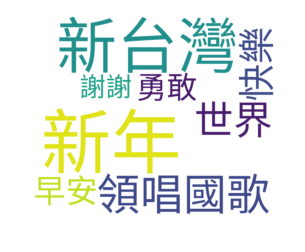

In [882]:
wc = WordCloud(font_path=font,  # 設定字型
background_color="white",  # 背景顏色
width=1000, height=860, margin=2,
)
wc.generate_from_frequencies(tfidf_list)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.figure()

## 2.1.2 Word Embedding (DDT)

In [877]:
from gensim.models import Word2Vec

In [878]:
new=[]
for i in range(len(new_data)):
    sent = new_data[i].split(' ')
    while '' in sent:
        sent.remove('') #移除空元素
    new.append(sent)

In [879]:
# build a Word2Vce model
model = Word2Vec(new, size=5 #embedding的數量
                 , window=5 #Ngram
                 , min_count=1 #字出現的次數
                 , workers=4 #CPU平行
                 , iter=50) #一筆資料訓練的次數
print('Word2Vec model=> ', model)

Word2Vec model=>  Word2Vec(vocab=18927, size=5, alpha=0.025)


In [885]:
# most similar words
print('most similar to 新年 =>')
print(model.wv.most_similar('新年', topn=5))
print()
print('most similar to 新台灣 =>')
print(model.wv.most_similar('新台灣', topn=5))
print()
print('most similar to 領唱國歌 =>')
print(model.wv.most_similar('領唱國歌', topn=5))
print()
print('most similar to 勇敢 =>')
print(model.wv.most_similar('勇敢', topn=5))
print()

most similar to 新年 =>
[('選', 0.9826583862304688), ('問境', 0.9808355569839478), ('志工團', 0.9801570177078247), ('夠團', 0.979627251625061), ('出發前', 0.976366400718689)]

most similar to 新台灣 =>
[('帶家屬', 0.9818788170814514), ('珍重', 0.9799848794937134), ('心話', 0.975762128829956), ('辣天', 0.9737516045570374), ('守護樣', 0.973741888999939)]

most similar to 領唱國歌 =>
[('定裡', 0.9989545345306396), ('出什', 0.9972941875457764), ('姑息', 0.9960532188415527), ('初選早', 0.9953938722610474), ('重證', 0.9947346448898315)]

most similar to 勇敢 =>
[('台灣點', 0.9970466494560242), ('拼搏', 0.9964616894721985), ('堅守', 0.9958710670471191), ('渴求', 0.9926969408988953), ('重務', 0.992644727230072)]



## 2.1.3 Apriori for NER (DDT)

In [822]:
import os
from pathlib import Path
from ckiptagger import WS, POS, NER

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### 載入ckiptagger斷詞，僅留下詞性為PERSON或ORG

In [826]:
path = os.path.join(str(Path.home()),r'C:\.ckip')
ckip_ws = WS(os.path.join(path, 'data'))
zh_doc_ws = ckip_ws(DDTls)
ckip_pos = POS(os.path.join(path,'data'))
zh_doc_pos = ckip_pos(zh_doc_ws)
ckip_ner = NER(os.path.join(path, 'data'))
zh_doc_ner = ckip_ner(zh_doc_ws, zh_doc_pos)

In [827]:
text=[]
for i, sentence in enumerate(zh_doc_ner):
    a=[]
    for j, (start_idx, end_index, ner_type, word) in enumerate(sentence):
        if ner_type == 'ORG' or ner_type == 'PERSON' :
            a.append(word)
    if len(a)==0:
        continue
    else:
        text.append(a)

In [828]:
text[:5]

[['蔡英文', '英安', '蔡英文', '蔡英文', '蔡英文'],
 ['洪慈庸'],
 ['羅貴星', '徐定禎'],
 ['新竹會', '鄭宏輝', '蔡英文', '鄭宏輝'],
 ['亞洲高階資產管理中心', '蔡英文']]

#### 將文字list轉為矩陣

In [829]:
dataset = text
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#print('item: {}'.format(te.columns_))
#print('matrix of first 5 samples: \n{}'.format(df.head(5)))

#### Apriori algorithm

In [830]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head() #頻繁項目集

,support,itemsets
0,0.010067,(Facebook)
1,0.011745,(Google)
2,0.013423,(中央)
3,0.011745,(中央氣象局)
4,0.010067,(內政部)


In [831]:
association_rules_by_conf = association_rules(frequent_itemsets, min_threshold=0) #所有
#print(association_rules_by_conf)
association_rules_by_conf["antecedent_len"] = association_rules_by_conf["antecedents"].apply(lambda x: len(x)) #先例元素數量
association_rules_by_conf["consequent_len"] = association_rules_by_conf["consequents"].apply(lambda x: len(x)) #後例元素數量

In [832]:
result = association_rules_by_conf[ (association_rules_by_conf['antecedent_len'] >= 1) &
                           (association_rules_by_conf['consequent_len'] >= 1) &
                           (association_rules_by_conf['confidence'] > 0.5) &
                           (association_rules_by_conf['lift'] > 1) ]
result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
0,(台灣隊),(日本隊),0.018456,0.010067,0.010067,0.545455,54.181818,0.009881,2.177852,1,1
1,(日本隊),(台灣隊),0.010067,0.018456,0.010067,1.000000,54.181818,0.009881,inf,1,1
6,(蘇),(蘇貞昌),0.021812,0.052013,0.015101,0.692308,13.310174,0.013966,3.080956,1,1
9,(蘇),(行政院),0.021812,0.055369,0.013423,0.615385,11.114219,0.012215,2.456040,1,1
12,(行政院農業委員會),(農委會),0.018456,0.026846,0.011745,0.636364,23.704545,0.011249,2.676174,1,1


---

## 2.2 KMT

In [886]:
#將list轉為string
KMTls=[]
for i in range(len(KMTdf)):
    post = str(KMTdf[i]).lstrip(" ['").rstrip("']")
    KMTls.append(post)

In [887]:
KMTls[0]

'【萌寵音樂嘉年華－嘉義場】 《萌寵音樂嘉年華》嘉義場順利落幕，非常感謝一同前來關懷毛小孩的熱情大小朋友們。此外，還要感謝好多位善良有愛心的民眾，發揮愛心來做公益，其中，公益T恤的競標價最高還高達台幣10萬元！ 歡迎各位好朋友們在自己經濟能力允許的範圍內一起響應，我們希望未來台灣是充滿溫馨與愛的地方，打造動物友善環境，並讓每一個寵物都能得到很好的照顧，愛護動物，我們大家一起來！'

### 讀入jieba 刪除停用詞

In [888]:
text = []
for line in KMTls:
    for j in stopWords:
        line = line.replace(j, '')
        line = line.replace('\n', '')
        line = line.replace('::', '')
    text.append(line)

In [889]:
text[0]

'【萌寵音樂嘉年華－嘉義場】 萌寵音樂嘉年華嘉義場利落幕非常感謝前關懷毛孩熱情朋友外感謝位善良愛心民眾發揮愛心做公益中公益T恤競標價高高達台幣萬元 歡迎位朋友濟力允許範圍響應希未台灣充滿溫馨愛方造動物友善環境寵物顧愛護動物家'

### 進行中文斷詞 (套入自定義辭典)

In [890]:
new_data=[]
for w in text:
    jieba.load_userdict("C:/Users/acgan/Desktop/Anaconda/NLP/TF-IDF/2020_dict.txt") #自定義字典
    segments=jieba.cut(w,cut_all=False)
    new_data.append(' '.join(segments))

In [891]:
new_data[0]

'【 萌寵 音樂嘉年華 － 嘉義場 】   萌寵 音樂嘉年 華嘉義場利 落幕 非常 感謝 前 關懷 毛孩 熱情 朋友 外感 謝位 善良 愛心民眾 發揮 愛心 做 公益 中 公益 T恤 競標價 高高 達台幣 萬元   歡迎位 朋友 濟力 允 許範圍 響 應希未 台灣 充滿 溫馨 愛方 造動物 友善 環境 寵物 顧愛護 動物家'

## 2.2.1 Text Visualization - TF-IDF (KMT)

In [892]:
vectorizer = CountVectorizer() #將詞語轉為詞頻矩陣
transformer = TfidfTransformer() #統計詞語的tf-idf權值

In [893]:
tfidf = transformer.fit_transform(vectorizer.fit_transform(new_data))  
word=vectorizer.get_feature_names()

In [894]:
weight=tfidf.toarray() #提取tf-idf權重
tfidf_list = {}
for i in range(len(weight)):#所有品項 
    for j in range(len(word)): #某一品項內的詞語權重 
        tfidf_list[word[j]] = weight[i][j]
len(tfidf_list)

13240

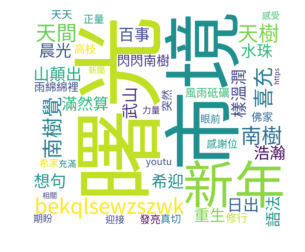

In [903]:
wc = WordCloud(font_path=font,  # 設定字型
background_color="white",  # 背景顏色
width=1000, height=860, margin=2,
)
wc.generate_from_frequencies(tfidf_list)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.figure()

## 2.2.2 Word Embedding (KMT)

In [896]:
new=[]
for i in range(len(new_data)):
    sent = new_data[i].split(' ')
    while '' in sent:
        sent.remove('') #移除空元素
    new.append(sent)

In [897]:
# build a Word2Vce model
model = Word2Vec(new, size=5 #embedding的數量
                 , window=5 #Ngram
                 , min_count=1 #字出現的次數
                 , workers=4 #CPU平行
                 , iter=50) #一筆資料訓練的次數
print('Word2Vec model=> ', model)

Word2Vec model=>  Word2Vec(vocab=14507, size=5, alpha=0.025)


In [906]:
# most similar words
print('most similar to 曙光 =>')
print(model.wv.most_similar('曙光', topn=5))
print()
print('most similar to 新年 =>')
print(model.wv.most_similar('新年', topn=5))
print()
print('most similar to 南樹 =>')
print(model.wv.most_similar('南樹', topn=5))
print()
print('most similar to 市境 =>')
print(model.wv.most_similar('市境', topn=5))
print()

most similar to 曙光 =>
[('想暴', 0.9981328248977661), ('恨', 0.9978410601615906), ('做出', 0.9978042840957642), ('進步', 0.9966391324996948), ('門句', 0.9966075420379639)]

most similar to 新年 =>
[('潭', 0.9996656179428101), ('戴象', 0.9996365308761597), ('家中', 0.9995204210281372), ('杜麗娘', 0.9994374513626099), ('伍中', 0.999405562877655)]

most similar to 南樹 =>
[('the', 0.9998922348022461), ('問世間', 0.9997876286506653), ('孫千委員', 0.9995696544647217), ('設計共讀', 0.9995575547218323), ('顆太陽', 0.9993894696235657)]

most similar to 市境 =>
[('營養求', 0.9997423887252808), ('平身', 0.9997366666793823), ('魔戒', 0.9997092485427856), ('判定', 0.9996205568313599), ('注重', 0.999614953994751)]



* 杜麗娘：韓國瑜凱道誓師隔日返高雄挺崑劇《牡丹亭》  
* 市境之南樹：韓國瑜元旦將在林園迎接高雄2019第一道曙光

## 2.2.3 Apriori for NER (KMT)

#### 載入ckiptagger斷詞，僅留下詞性為PERSON或ORG

In [843]:
path = os.path.join(str(Path.home()),r'C:\.ckip')
ckip_ws = WS(os.path.join(path, 'data'))
zh_doc_ws = ckip_ws(KMTls)
ckip_pos = POS(os.path.join(path,'data'))
zh_doc_pos = ckip_pos(zh_doc_ws)
ckip_ner = NER(os.path.join(path, 'data'))
zh_doc_ner = ckip_ner(zh_doc_ws, zh_doc_pos)

In [844]:
text=[]
for i, sentence in enumerate(zh_doc_ner):
    a=[]
    for j, (start_idx, end_index, ner_type, word) in enumerate(sentence):
        if ner_type == 'ORG' or ner_type == 'PERSON' :
            a.append(word)
    if len(a)==0:
        continue
    else:
        text.append(a)

In [851]:
text[:2]

[['嘉義場'], ['民進黨', '蔡英文', '蔡英文']]

#### 將文字list轉為矩陣

In [852]:
dataset = text
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#print('item: {}'.format(te.columns_))
#print('matrix of first 5 samples: \n{}'.format(df.head(5)))

#### Apriori algorithm

In [853]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head() #頻繁項目集

,support,itemsets
0,0.015686,(中共)
1,0.027451,(中央)
2,0.015686,(中央氣象局)
3,0.015686,(中時電子報)
4,0.023529,(中華隊)


In [855]:
association_rules_by_conf = association_rules(frequent_itemsets, min_threshold=0) #所有
#print(association_rules_by_conf)
association_rules_by_conf["antecedent_len"] = association_rules_by_conf["antecedents"].apply(lambda x: len(x)) #先例元素數量
association_rules_by_conf["consequent_len"] = association_rules_by_conf["consequents"].apply(lambda x: len(x)) #後例元素數量

In [856]:
result = association_rules_by_conf[ (association_rules_by_conf['antecedent_len'] >= 1) &
                           (association_rules_by_conf['consequent_len'] >= 1) &
                           (association_rules_by_conf['confidence'] > 0.5) &
                           (association_rules_by_conf['lift'] > 1) ]
result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
1,(中共),(民進黨),0.015686,0.094118,0.011765,0.75,7.968750,0.010288,3.623529,1,1
4,(吳敦義),(國民黨),0.011765,0.039216,0.011765,1.00,25.500000,0.011303,inf,1,1
6,(國政顧問團),(張善政),0.019608,0.054902,0.015686,0.80,14.571429,0.014610,4.725490,1,1
9,(朱立倫),(國民黨),0.011765,0.039216,0.011765,1.00,25.500000,0.011303,inf,1,1
11,(國民黨),(韓國瑜),0.039216,0.137255,0.023529,0.60,4.371429,0.018147,2.156863,1,1
